# Imports

In [4]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from IPython.core.display import display

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

# Constants

In [5]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Preprocessing Images

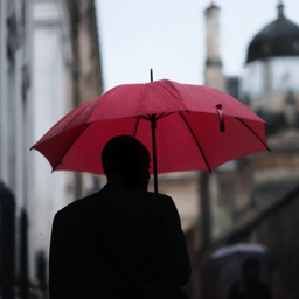

In [6]:
pic = load_img(FILE_1, target_size=(299, 299))
display(pic)

In [7]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [8]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [9]:
preprocessed = preprocess_input(expanded)

A function called ```format_img_inceptionresnet()``` that takes a filename as an argument. The function needs to load the image in the default resolution for InceptionResNetv2, convert the image to an array and return the preprocessed image for the InceptionResNetv2 model. 

In [10]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input(expanded)

In [11]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_arr = img_to_array(pic)
  expanded = pic_arr.reshape(1, pic_arr.shape[0], pic_arr.shape[1], pic_arr.shape[2])
  return preprocess_input_vgg19(expanded)

# Load InceptionResNet

In [12]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

225214464/225209952 [==============================] - 2s 0us/step
CPU times: user 6.46 s, sys: 1.21 s, total: 7.68 s
Wall time: 7.99 s


In [14]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

In [15]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n04507155', 'umbrella', 0.82924366),
  ('n03792972', 'mountain_tent', 0.0012268272),
  ('n04479046', 'trench_coat', 0.0011062962),
  ('n03788195', 'mosque', 0.0010572362),
  ('n03220513', 'dome', 0.0010310994)]]

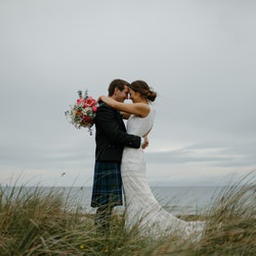

[[('n10148035', 'groom', 0.7042389),
  ('n03450230', 'gown', 0.11669549),
  ('n11879895', 'rapeseed', 0.016582673),
  ('n09421951', 'sandbar', 0.012790637),
  ('n03534580', 'hoopskirt', 0.0072877705)]]

In [16]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)

# Testing the VGG19 Model

Use the VGG19 Model from Keras with the ImageNet weights to make a prediction on several of the sample images. Load the model into the notebook. Process the data for VGG19. Then make a prediction. Look at the documentation for hints. 

In [17]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 7s 0us/step


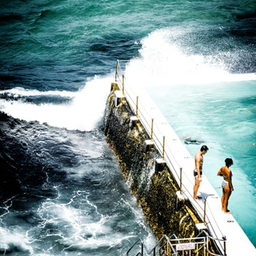

[[('n04347754', 'submarine', 0.16831148),
  ('n02894605', 'breakwater', 0.12554657),
  ('n03662601', 'lifeboat', 0.09670137),
  ('n09399592', 'promontory', 0.08424033),
  ('n02981792', 'catamaran', 0.08419343)]]

In [18]:
data = format_img_vgg19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)

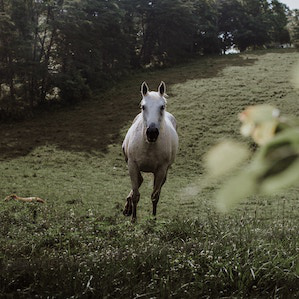

[[('n02412080', 'ram', 0.73425174),
  ('n02415577', 'bighorn', 0.11609409),
  ('n02403003', 'ox', 0.01753327),
  ('n02437616', 'llama', 0.011443049),
  ('n02091134', 'whippet', 0.00935114)]]

In [19]:
data = format_img_vgg19('04 Horse.jpg')
pred = vgg19_model.predict(data)
display(load_img('04 Horse.jpg'))
decode_vgg19(pred)